In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
sys.path.append('/usr/local/lib/python2.7/site-packages')
import cv
import cv2 #First install python-openCV
from sklearn import cross_validation

/home/alex/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

In [3]:
allTraingData = np.genfromtxt('train.csv', delimiter=',')
allTestData = np.genfromtxt('test.csv', delimiter = ',')

In [4]:
trainingPixmaps = allTraingData[:,9:438]
trainingClasses =  allTraingData[:,1]



X_train, X_test, y_train, y_test = cross_validation.train_test_split (trainingPixmaps, trainingClasses, 
                                                                      test_size=0.20, random_state=0)

In [ ]:
#http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
img = trainingPixmaps[0].reshape(33,13)
img = img.astype(np.uint8)
img = cv2.medianBlur(img,1)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [5]:
def removeNoise(image) :
    image = image.reshape(33,13)
    image = image.astype(np.uint8)
    ret,th1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    th1 = th1.reshape(429)
    return th1

In [6]:
def centreImage(image) : 
    image = image.reshape(33,13)
    imageTotalSum = np.sum(image)
    halfSum = imageTotalSum / 2
    
    rowSums = np.sum(image, axis = 1)
    colSums = np.sum(image, axis = 0)
    
    rowId = 0
    i = 0
    while (i < halfSum) :
        i += rowSums[rowId]
        rowId += 1
        
    colId = 0
    i = 0
    while (i < halfSum) :
        i += colSums[colId]
        colId += 1
    imageCentreX = colId
    imageCentreY = rowId
    
    print(imageCentreX)
    print(imageCentreY)
    
    return image

In [7]:
def removeWhitespace(image):
    image = image.reshape(33,13)
    rowSums = np.sum(image, axis = 1)
    colSums = np.sum(image, axis = 0)
    blankRowsStart = 0
    blankRowsEnd = 13
    blankColumnsStart = 0
    blankColumsnEnd = 33
    
    #Top rows margin
    isBlank = 1
    count = 0;
    while(isBlank and count != 32) :
        if(rowSums[count] == 0) :
            count += 1
        else :
            isBlank = 0
            
    blankRowsStart = 0 + count
    
    #Bottom rows margin
    isBlank = 1
    count = 32;
    while(isBlank and count != 1) :
        if(rowSums[count] == 0) :
            count -= 1
        else :
            isBlank = 0
            
    blankRowsEnd = count
    
    
        #Left cols margin
    isBlank = 1
    count = 0;
    while(isBlank and count != 12) :
        if(colSums[count] == 0) :
            count += 1
        else :
            isBlank = 0
            
    blankColumnsStart = 0 + count
    
    #Bottom rows margin
    isBlank = 1
    count = 12;
    while(isBlank and count != 1) :
        if(colSums[count] == 0) :
            count -= 1
        else :
            isBlank = 0
            
    blankColumsnEnd =  count
    
    if blankColumsnEnd != 12 :
        blankColumsnEnd += 1
        
    if blankRowsEnd != 32 :
        blankRowsEnd += 1
        
    if (blankRowsStart == 32) :
        blankRowsStart = 0
    if (blankColumnsStart == 12):
        blankColumnsStart = 0
        
    #print(blankRowsStart)
    #print(blankRowsEnd)
    #print(blankColumnsStart)
    #print(blankColumsnEnd)
    smallImage = image[blankRowsStart:blankRowsEnd,blankColumnsStart:blankColumsnEnd]
    scaledImage = cv2.resize(smallImage, (13,33))
    #resized_image = cv2.resize(image, (100, 50)) 
    return scaledImage.reshape(429)


<function matplotlib.pyplot.show>

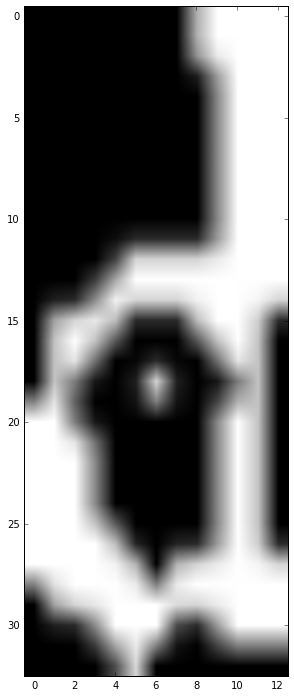

In [27]:
img2 = X_train[0].reshape(33,13)
#img = img.astype(np.uint8)
#print(img)
img2 = removeNoise(img).reshape(33,13)
#print(img.reshape(13,33))
img2 = removeWhitespace(img).reshape(33,13)
#centreImage(img)
#print(smallImage)

#smallImage = smallImage[10:24,1:13]
plt.imshow(img2, 'gray')
#plt.imshow(scaledImage, 'gray')
plt.show

In [ ]:

firstImage = 0
lastImage = 10
numImages = lastImage - firstImage
for i in range (0,numImages) :
    img = trainingPixmaps[i + firstImage].reshape(33,13)
    imgRN = removeNoise(img).reshape(33,13)
    imgCT = centreImage(img).reshape(33,13)
    
    plt.subplot(numImages,2, (i*2)+1), plt.imshow(img, 'gray')
    plt.title('Original')
    plt.xticks([]),plt.yticks([])
    plt.subplot(numImages,2, (i*2)+2), plt.imshow(imgRN, 'gray')
    plt.title('Cleaned')
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
# Take largest shape from the object
# Count how many there are

#needs a cleaned image
def islands (image):
    img = image.reshape(33,13)

    for i in range 
#Centralised Zoning # Height and width dimensions # Sobel filters left right diagonal
#Dynamic value for the threshold

# dynamic programming number of islands


In [8]:
cleanedFeatures = []
#reshapedTraining = np.asarray(trainingPixmaps).reshape(33,13,35000)
for i in range (0,len(X_train)) :
    #print(i)
    dataPoint = X_train[i]
    cleanDataPoint = removeNoise(dataPoint)
    scaledImage = removeWhitespace(cleanDataPoint)
    cleanedFeatures.append(scaledImage)

In [9]:
cleanedCVFeatures = []
#reshapedTraining = np.asarray(trainingPixmaps).reshape(33,13,35000)
for i in range (0,len(X_test)) :
    dataPoint = X_test[i]
    cleanDataPoint = removeNoise(dataPoint)
    scaledImage = removeWhitespace(cleanDataPoint)
    cleanedCVFeatures.append(scaledImage)

In [10]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 3, algorithm='ball_tree').fit(cleanedFeatures)

In [11]:
distances, indices = nbrs.kneighbors(np.array(cleanedCVFeatures))

In [12]:
totalCorrect = 0
wrongOnes = []
correctOnes = []
for i in range (0,len(y_test)) :
    nearestPoints = indices[i]
    closestPoints = []
    for j in range (0,3) :
        closestPoints.append(y_train[nearestPoints[j]])
        
    from collections import Counter
    data = Counter(closestPoints)
    classification = data.most_common(1)  # Returns the highest occurring item
    temp = []
    temp.append(i)
    for k in range (0,3):
        temp.append(nearestPoints[k])
    if (classification[0][0] == y_test[i]):
      totalCorrect += 1
      correctOnes.append(temp)
    else :
        wrongOnes.append(temp)

print(wrongOnes[0])
        

print (totalCorrect)
print (len(y_test))


[2, 5950, 19408, 36042]
6198
10057


In [ ]:
# Look at the ones which were wrong:


The correct Classifcaiton of the point is 43.0
The classification of the nearest training point is 72.0
The classification of the second nearest training point is 72.0
The classification of the third nearest training point is 72.0


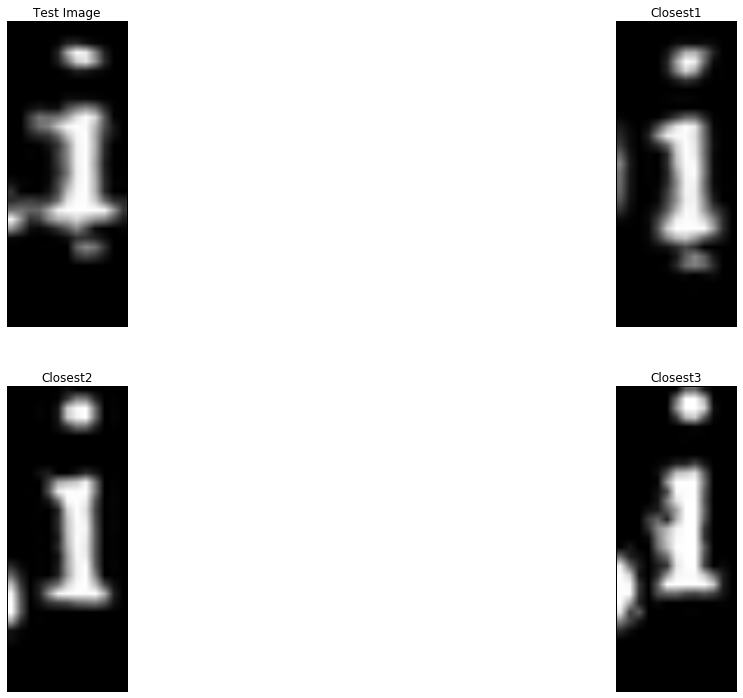

In [19]:

point = wrongOnes[667]


print("The correct Classifcaiton of the point is " + str(y_test[point[0]]))
print("The classification of the nearest training point is " + str(y_train[point[1]]))
print("The classification of the second nearest training point is " + str(y_train[point[2]]))
print("The classification of the third nearest training point is " + str(y_train[point[3]]))
img = X_test[point[0]].reshape(33,13)
closest1 = X_train[point[1]].reshape(33,13)
closest2 = X_train[point[2]].reshape(33,13)
closest3 = X_train[point[3]].reshape(33,13)


titles = ['Test Image', 'Closest1',
            'Closest2', 'Closest3']
images = [img, closest1, closest2, closest3]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
testIds = allTestData[:,0]
testPixmaps = allTestData[:,9:438]

In [ ]:
cleanedTestFeatures = []
#reshapedTraining = np.asarray(trainingPixmaps).reshape(33,13,35000)
for i in range (0,len(testPixmaps)) :
    dataPoint = testPixmaps[i]
    cleanDataPoint = removeNoise(dataPoint)
    scaledImage = removeWhitespace(cleanDataPoint)
    cleanedTestFeatures.append(scaledImage)

In [ ]:
distancesTest, indicesTest = nbrs.kneighbors(np.array(cleanedTestFeatures))

In [ ]:
results = []
pointsss = []

for i in range (0,len(testIds)) :
    nearestPoints = indicesTest[i]
    closestPoints = []
    for j in range (0,3) :
        closestPoints.append(y_train[nearestPoints[j]])
        
    from collections import Counter
    data = Counter(closestPoints)
    classification = data.most_common(1)  # Returns the highest occurring item
    
    temp = []
    temp.append(testIds[i])
    temp.append(classification[0][0])
    results.append(temp)
    
    temp2 = []
    temp2.append(i)
    for k in range (0,3):
        temp2.append(nearestPoints[k])
    pointsss.append(temp2)


In [ ]:

point = pointsss[0]


#print("The correct Classifcaiton of the point is " + str(y_test[point[0]]))
print("The classification of the nearest training point is " + str(y_train[point[1]]))
print("The classification of the second nearest training point is " + str(y_train[point[2]]))
print("The classification of the third nearest training point is " + str(y_train[point[3]]))
img = testPixmaps[point[0]].reshape(33,13)
closest1 = X_train[point[1]].reshape(33,13)
closest2 = X_train[point[2]].reshape(33,13)
closest3 = X_train[point[3]].reshape(33,13)


titles = ['Test Image', 'Closest1',
            'Closest2', 'Closest3']
images = [img, closest1, closest2, closest3]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
results[0]

In [ ]:
import csv

with open("output.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerows(results)